In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/home/hemanth/Documents/XGBoosting/Skyserver_SQL2_27_2018 6_51_39 PM.csv")

In [3]:
data.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [4]:
data.tail()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
9995,1.237650e+18,131.316413,51.539547,18.81777,17.47053,16.91508,16.68305,16.50570,1345,301,3,161,5.033450e+17,GALAXY,0.027583,447,51877,246
9996,1.237650e+18,131.306083,51.671341,18.27255,17.43849,17.07692,16.71661,16.69897,1345,301,3,162,5.033400e+17,GALAXY,0.117772,447,51877,228
9997,1.237650e+18,131.552562,51.666986,18.75818,17.77784,17.51872,17.43302,17.42048,1345,301,3,162,8.222620e+18,STAR,-0.000402,7303,57013,622
9998,1.237650e+18,131.477151,51.753068,18.88287,17.91068,17.53152,17.36284,17.13988,1345,301,3,163,5.033400e+17,GALAXY,0.014019,447,51877,229
9999,1.237650e+18,131.665012,51.805307,19.27586,17.37829,16.30542,15.83548,15.50588,1345,301,3,163,5.033410e+17,GALAXY,0.118417,447,51877,233


In [5]:
data.shape

(10000, 18)

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
objid,10000.0,1.237650e+18,0.000000e+00,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18,1.237650e+18
ra,10000.0,1.755300e+02,4.778344e+01,8.235100e+00,1.573709e+02,1.803945e+02,2.015473e+02,2.608844e+02
dec,10000.0,1.483615e+01,2.521221e+01,-5.382632e+00,-5.390350e-01,4.041660e-01,3.564940e+01,6.854227e+01
u,10000.0,1.861936e+01,8.286560e-01,1.298897e+01,1.817804e+01,1.885309e+01,1.925923e+01,1.959990e+01
g,10000.0,1.737193e+01,9.454572e-01,1.279955e+01,1.681510e+01,1.749513e+01,1.801015e+01,1.991897e+01
r,10000.0,1.684096e+01,1.067764e+00,1.243160e+01,1.617333e+01,1.685877e+01,1.751268e+01,2.480204e+01
i,10000.0,1.658358e+01,1.141805e+00,1.194721e+01,1.585370e+01,1.655499e+01,1.725855e+01,2.817963e+01
z,10000.0,1.642283e+01,1.203188e+00,1.161041e+01,1.561829e+01,1.638995e+01,1.714145e+01,2.283306e+01
run,10000.0,9.810348e+02,2.733050e+02,3.080000e+02,7.520000e+02,7.560000e+02,1.331000e+03,1.412000e+03
rerun,10000.0,3.010000e+02,0.000000e+00,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


In [8]:
data.isna().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

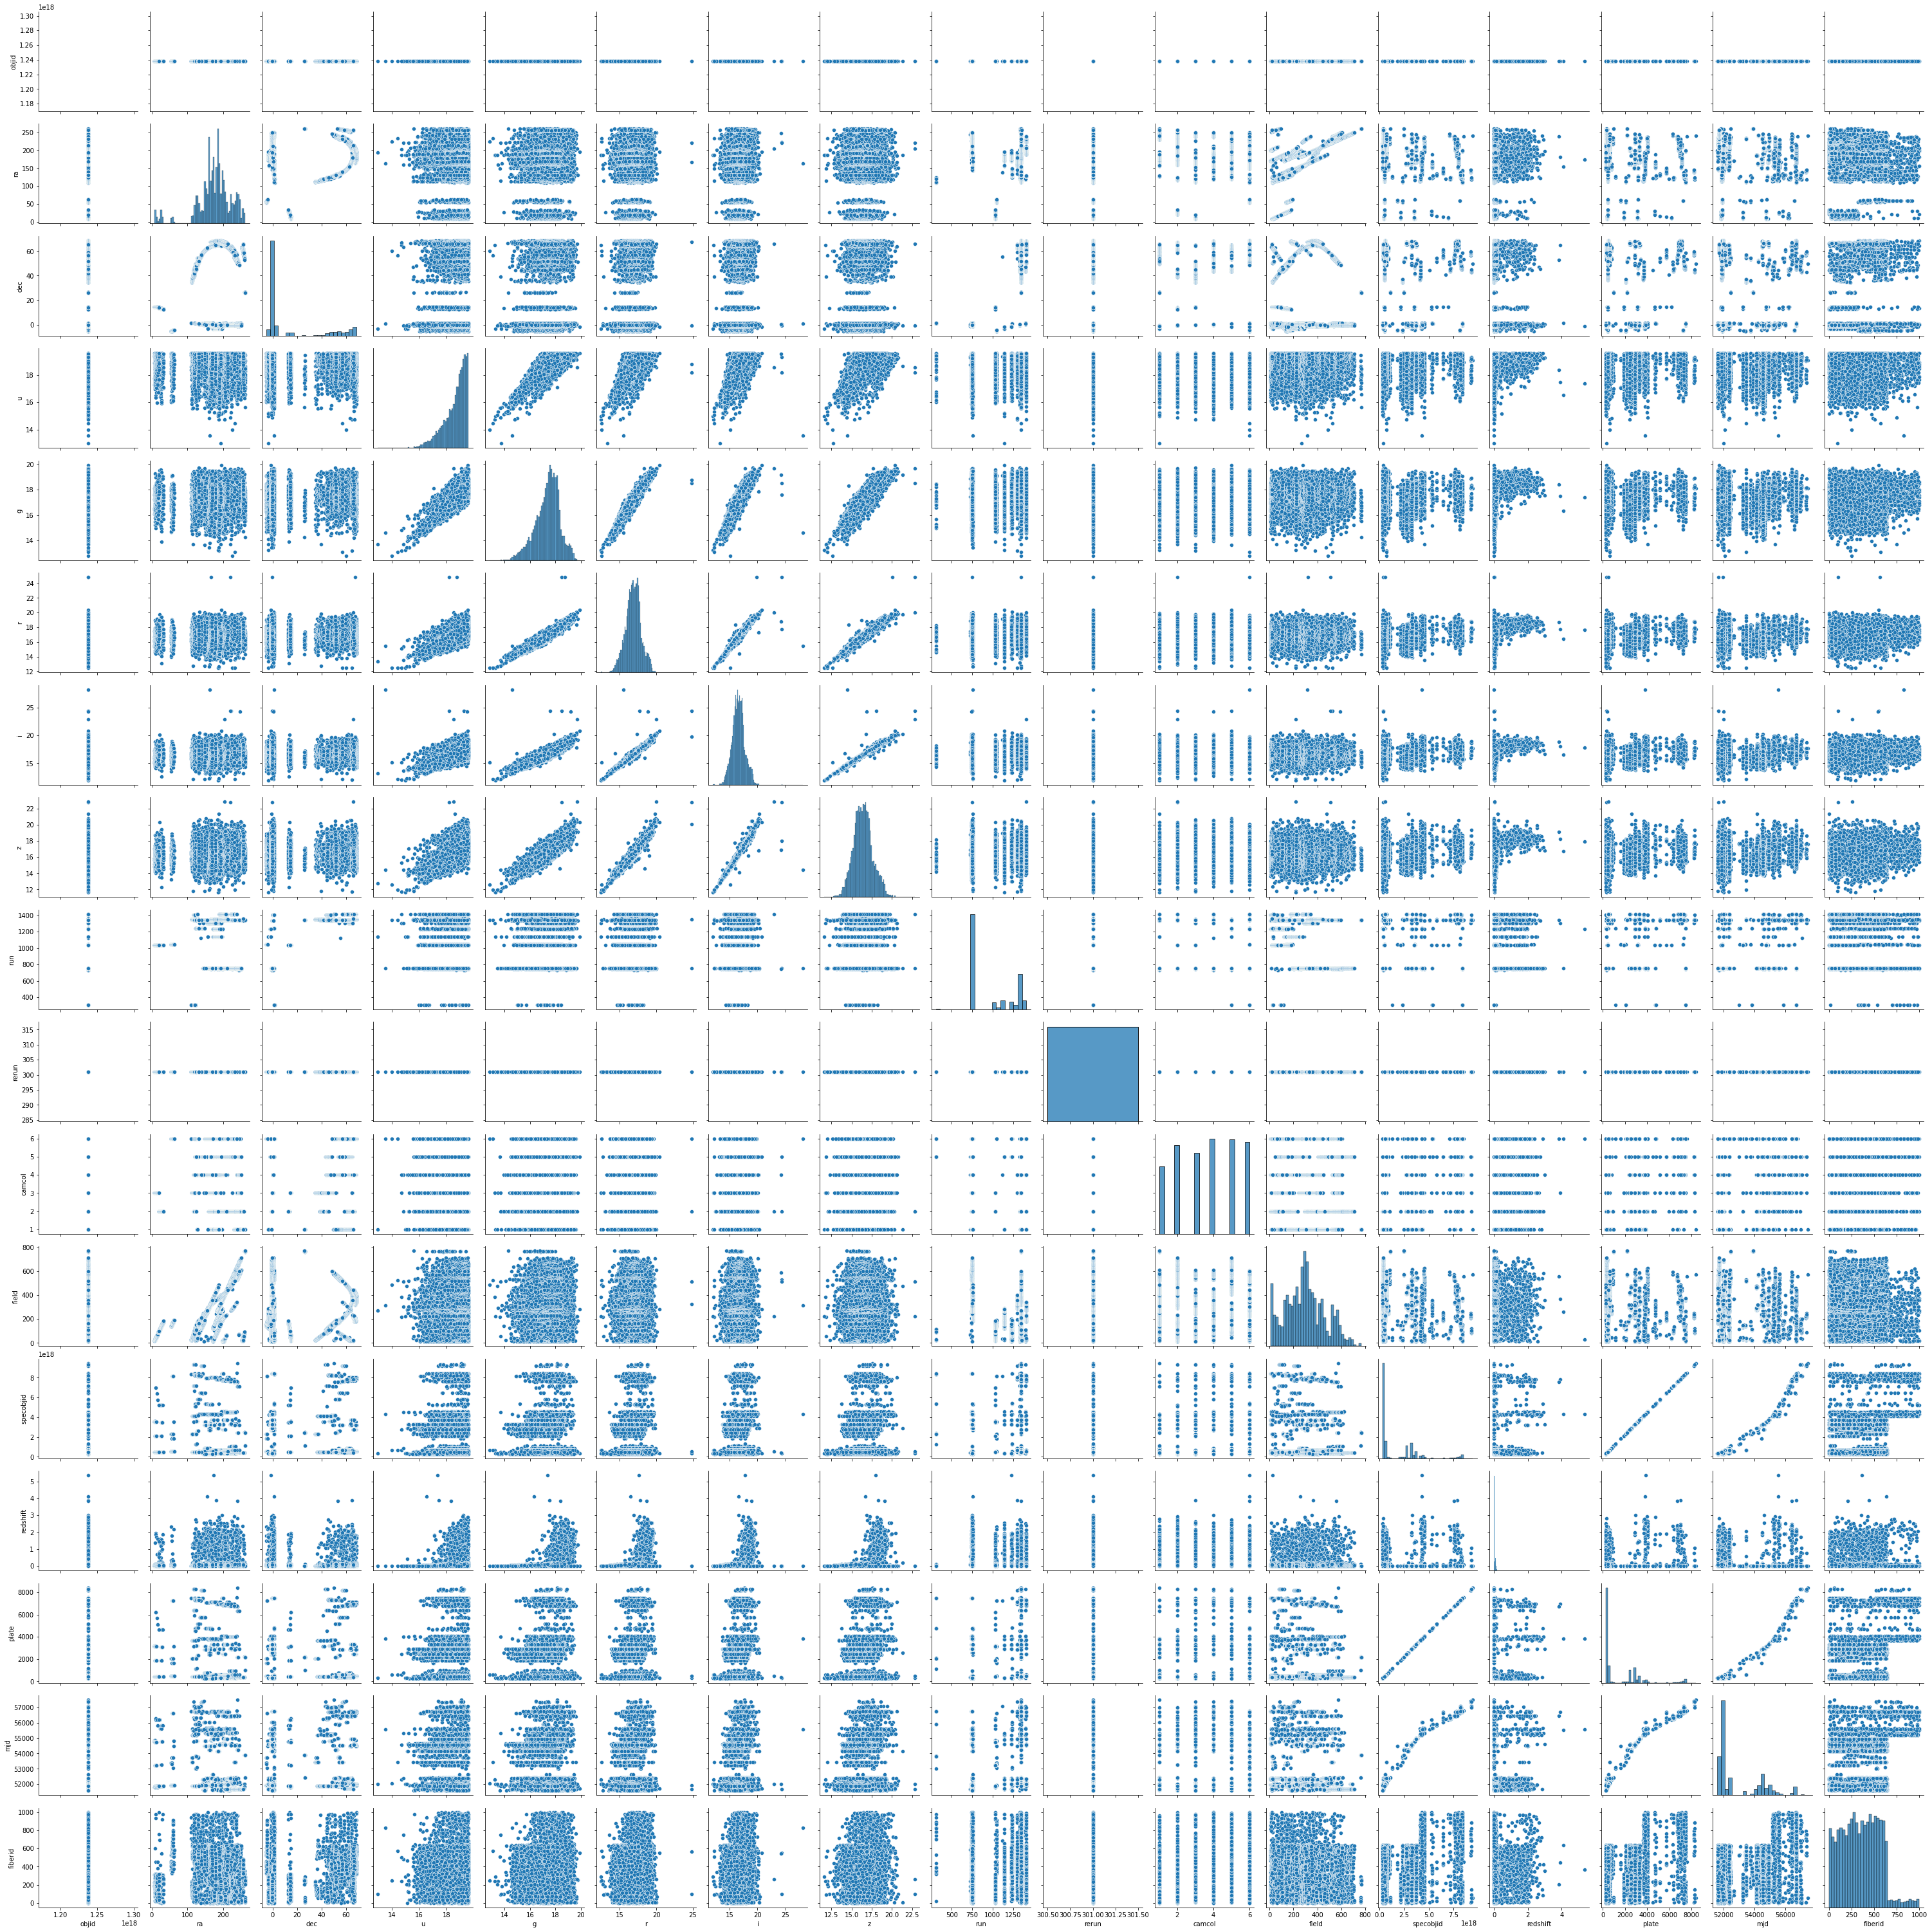

In [9]:
sns.pairplot(data)

In [44]:
data.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [45]:
data['class'].value_counts()

0    4998
2    4152
1     850
Name: class, dtype: int64

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

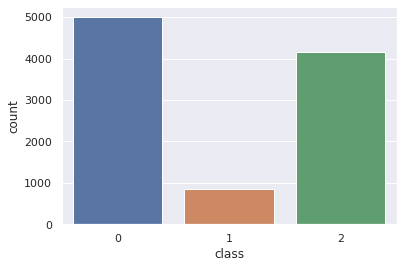

In [46]:
# labelEncoder present in scikitlearn library 
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder() 
data['class'] = le.fit_transform(data['class']) 
sns.set(style ="darkgrid") 
sns.countplot(data['class']) 


In [47]:
x=data.drop(['class'],axis=1)
y=data['class']

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [49]:
svm_clas=SVC()

In [50]:
svm_clas.fit(X_train,y_train)

SVC()

In [51]:
train_score=svm_clas.score(X_train,y_train)
train_score

0.796

In [52]:
test_score=svm_clas.score(X_test,y_test)
test_score

0.7986666666666666

In [53]:
svm_predict= svm_clas.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
original_data=accuracy_score(svm_predict,y_test)
original_data

0.7986666666666666

In [55]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84      1953
           1       0.00      0.00      0.00         0
           2       0.76      0.91      0.83      1047

    accuracy                           0.80      3000
   macro avg       0.58      0.55      0.56      3000
weighted avg       0.90      0.80      0.84      3000



/home/hemanth/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
col_names = list(x.columns)

In [57]:
x.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/hemanth/.local/lib/python3.8/site-packages/seaborn/distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


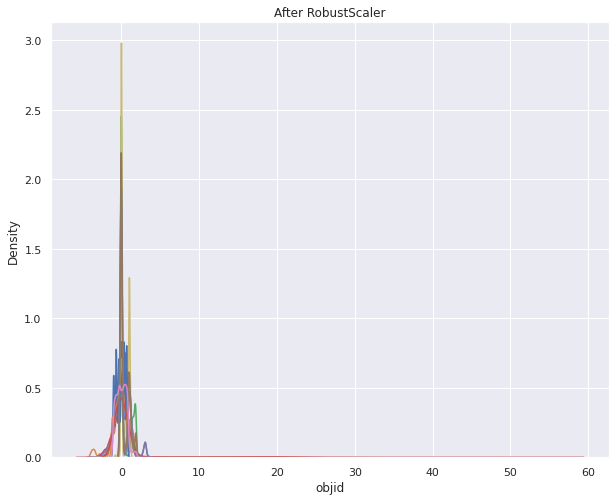

In [58]:
from sklearn import preprocessing
r_scaler = preprocessing.RobustScaler()
df_r = r_scaler.fit_transform(x)

df_r = pd.DataFrame(df_r, columns=col_names)

fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 8))
ax1.set_title('After RobustScaler')

sns.kdeplot(df_r['objid'], ax=ax1)
sns.kdeplot(df_r['ra'], ax=ax1)
sns.kdeplot(df_r['dec'], ax=ax1)
sns.kdeplot(df_r['u'], ax=ax1)
sns.kdeplot(df_r['g'], ax=ax1)
sns.kdeplot(df_r['r'], ax=ax1)
sns.kdeplot(df_r['i'], ax=ax1)
sns.kdeplot(df_r['z'], ax=ax1)
sns.kdeplot(df_r['run'], ax=ax1)

sns.kdeplot(df_r['rerun'], ax=ax1)
sns.kdeplot(df_r['camcol'], ax=ax1)
sns.kdeplot(df_r['field'], ax=ax1)
sns.kdeplot(df_r['specobjid'], ax=ax1)
sns.kdeplot(df_r['redshift'], ax=ax1)
sns.kdeplot(df_r['plate'], ax=ax1)
sns.kdeplot(df_r['mjd'], ax=ax1);
sns.kdeplot(df_r['fiberid'], ax=ax1);
#sns.kdeplot(df_r['run'], ax=ax1);

<AxesSubplot:>

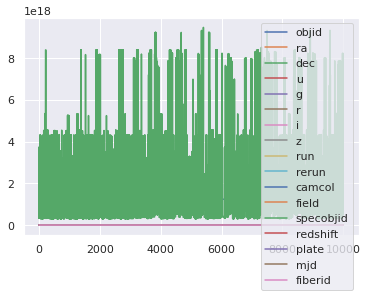

In [59]:
x.plot()

In [60]:
X_train,X_test,y_train,y_test=train_test_split(df_r,y,test_size=0.25,random_state=2)

In [61]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7500, 17)
(2500, 17)
(7500,)
(2500,)


In [62]:
svm_rb=SVC()

In [63]:
svm_rb.fit(X_train,y_train)

SVC()

In [64]:
train_score=svm_rb.score(X_train,y_train)
train_score

0.9817333333333333

In [65]:
test_score=svm_rb.score(X_test,y_test)
test_score

0.9844

In [67]:
svm_predict_rs= svm_rb.predict(X_test)

In [68]:
svm_rf=accuracy_score(svm_predict_rs,y_test)
svm_rf

0.9844

In [69]:
print(classification_report(svm_predict_rs,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1209
           1       0.93      1.00      0.96       211
           2       1.00      0.98      0.99      1080

    accuracy                           0.98      2500
   macro avg       0.97      0.99      0.98      2500
weighted avg       0.98      0.98      0.98      2500



In [75]:
pd.DataFrame({"Scalling Names":['original_data','Robustscalar'],
            "Accuracy socre":[original_data,svm_rf]})

,Scalling Names,Accuracy socre
0,original_data,0.798667
1,Robustscalar,0.984400


In [76]:
sample=pd.DataFrame({"Actual Rating":y_test,
             "Predicted Rating":np.round(svm_predict_rs,2)})
sample

,Actual Rating,Predicted Rating
7878,0,0
3224,0,0
1919,0,0
4432,0,0
4835,0,0
...,...,...
8042,0,0
9060,0,0
8093,0,0
3858,2,2


In [77]:
sample.to_csv("sample_predict_SkeyServer.csv",index=False)